In [1]:
import torch
import torchvision  
import torch.nn.functional as F  

from torch import optim 
from torch import nn  
from torch.utils.data import DataLoader 

from tqdm import tqdm 
import matplotlib.pyplot as plt
import numpy as np
import utils

C:\Users\mati\anaconda3\envs\pytorch_2022\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [3]:
batch_size = 64

## Load data

In [55]:
custom_train_loader = utils.MnistSequences()
custom_test_loader = utils.MnistSequences(train=False)

In [56]:
custom_train_loader.reset()
custom_test_loader.reset()

train_loader = DataLoader(dataset=custom_train_loader, batch_size=64, shuffle=True)
test_loader = DataLoader(dataset=custom_test_loader, batch_size=64, shuffle=True)

## Visualize data

label: tensor(0)


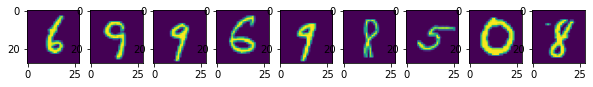

In [6]:
(x, y) = next(iter(train_loader))

columns = len(x[0])
rows = 1
fig = plt.figure(figsize=(10, 10))

for idx in range(1*columns):
    
    image = x[0][idx]
    fig.add_subplot(rows, columns, idx+1)
    plt.imshow(image)
    
print("label:", y[0])

## Model

In [34]:
input_size = 28*28
hidden_size = 16
num_classes = 2
learning_rate = 0.001
num_epochs = 1

In [41]:
class LSTM_Model(nn.Module):
    def __init__(self, input_size, hidden_size, num_classes):
        super(LSTM_Model, self).__init__()
        self.hidden_size = hidden_size
        self.lstm = nn.LSTM(input_size, hidden_size, batch_first=True)
        self.fc = nn.Linear(hidden_size, num_classes)

    def forward(self, x):
        
        # Declare c0 and h0 hidden states for start lstm sequence
        c0 = torch.zeros(1, x.size(0), self.hidden_size).to(device)
        h0 = torch.zeros(1, x.size(0), self.hidden_size).to(device)
        
        batch_size, timesteps, H, W = x.size()
        x = x.view(batch_size,timesteps,-1)

        out, _ = self.lstm(x, (h0, c0))  
        out = out[:, -1, :]
        out = out.reshape(out.shape[0], -1)

        out = self.fc(out)
        return out

In [44]:
model = LSTM_Model(input_size, hidden_size, num_classes).to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

In [51]:
for epoch in range(num_epochs):
    for batch_idx, (x_data, y_data) in enumerate(tqdm(train_loader)):

        x_data = x_data.to(device=device).squeeze(1)
        y_data = y_data.to(device=device)

        # forward
        outputs = model(x_data)
        loss = criterion(outputs, y_data)

        # backward
        optimizer.zero_grad()
        loss.backward()

        optimizer.step()


100%|████████████████████████████████████████████████████████████████████████████████| 938/938 [02:19<00:00,  6.75it/s]


## Test

In [57]:
def check_accuracy(data_loader, model):
    
    N = 0
    num_correct = 0
    
    # Set model to evaluate state
    model.eval()

    with torch.no_grad():
        for x_data, y_data in data_loader:
            
            x_data = x_data.to(device=device).squeeze(1)
            y_data = y_data.to(device=device)

            predictions = model(x_data)
            _, predictions = predictions.max(1)
            num_correct += (predictions == y_data).sum()
            N += predictions.size(0)

            print("Accuracy", 100. * num_correct / N)


check_accuracy(test_loader, model)

Accuracy tensor(96.8750)
Accuracy tensor(96.0938)
Accuracy tensor(94.2708)
Accuracy tensor(93.7500)
Accuracy tensor(93.1250)
Accuracy tensor(93.4896)
Accuracy tensor(93.5268)
Accuracy tensor(93.3594)
Accuracy tensor(93.4028)
Accuracy tensor(93.9062)
Accuracy tensor(94.0341)
Accuracy tensor(93.4896)
Accuracy tensor(93.7500)
Accuracy tensor(93.9732)
Accuracy tensor(94.1667)
Accuracy tensor(94.0430)
Accuracy tensor(94.2096)
Accuracy tensor(94.2708)
Accuracy tensor(94.2434)
Accuracy tensor(94.4531)
Accuracy tensor(94.4940)
Accuracy tensor(94.3892)
Accuracy tensor(94.4293)
Accuracy tensor(94.6615)
Accuracy tensor(94.5625)
Accuracy tensor(94.6514)
Accuracy tensor(94.6759)
Accuracy tensor(94.8103)
Accuracy tensor(94.9353)
Accuracy tensor(95.)
Accuracy tensor(95.0605)
Accuracy tensor(95.0195)
Accuracy tensor(94.9811)
Accuracy tensor(94.9908)
Accuracy tensor(94.9554)
Accuracy tensor(94.9653)
Accuracy tensor(94.8902)
Accuracy tensor(94.8191)
Accuracy tensor(94.7115)
Accuracy tensor(94.7656)
Accu

KeyboardInterrupt: 